## Sales Analysis (Practice)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style= 'white', color_codes=True)
%matplotlib inline

In [6]:
import os

In [13]:
files = [file for file in os.listdir('C:/Users/HP/Downloads/Sales_Analysis/')]

all_months_data= pd.DataFrame()

for file in files:
    df = pd.read_csv('C:/Users/HP/Downloads/Sales_Analysis/' + file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [14]:
all_months_data.to_csv("all_data.csv", index=False)

In [15]:
ruta = os.path.abspath('all_data.csv')
print("El archivo se guardó en: ", ruta)

El archivo se guardó en:  c:\Users\HP\AppData\Local\Programs\Microsoft VS Code\all_data.csv


In [17]:
all_data= pd.read_csv("all_data.csv")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [39]:
all_data= all_data.dropna()


In [40]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## General Cleaning

In [42]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [50]:
print(all_data['Month'].unique())


['04' '05' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


In [53]:
all_data['Month']= all_data['Month'].astype('int32')
print(all_data.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object


In [56]:
# Add sales column

all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
print(all_data.dtypes)

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object


1. What was the best month for sales, how much was earned?

In [57]:
all_data['Sales'] = all_data['Price Each']* all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [63]:
resultado = all_data.groupby('Month').sum()


In [ ]:
resultado.head()

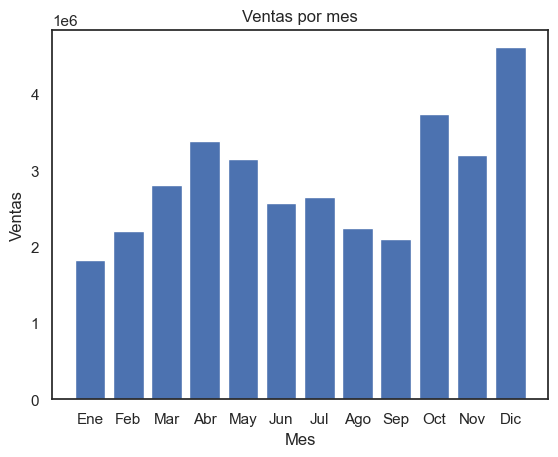

In [74]:

months = range(1, 13)

plt.bar(months, resultado['Sales'])

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Ventas por mes')

plt.xticks(months, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])


plt.show()


2. What city had the highest number of sales?

In [75]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [77]:
# Define a function to extract the city from the address
def extract_city(address):
    parts = address.split(", ")
    return parts[1]

# Apply the function to create the new "City" column
all_data['City'] = all_data['Purchase Address'].apply(extract_city)


In [83]:
print(all_data['City'].unique())

['Dallas' 'Boston' 'Los Angeles' 'San Francisco' 'Seattle' 'Atlanta'
 'New York City' 'Portland' 'Austin']


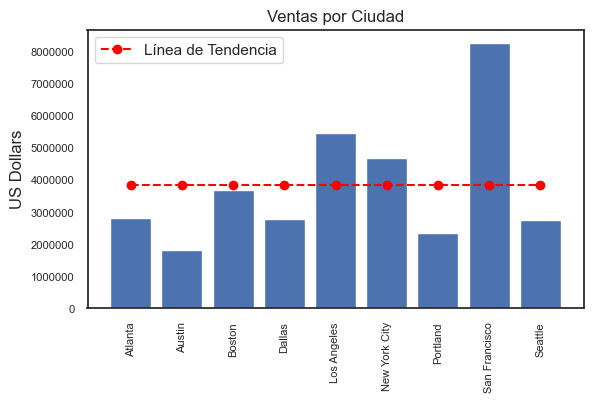

In [115]:

ventas_por_ciudad = all_data.groupby('City')['Sales'].sum()

plt.bar(ventas_por_ciudad.index, ventas_por_ciudad.values)

# Calcula la tendencia (por ejemplo, una línea recta que pase por el punto medio de cada barra)
tendencia_x = np.arange(len(ventas_por_ciudad))
tendencia_y = np.mean(ventas_por_ciudad.values) * np.ones_like(tendencia_x)

# Traza la línea de tendencia en puntos
plt.plot(tendencia_x, tendencia_y, linestyle='--', color='red', marker='o', label='Línea de Tendencia')

plt.title('Ventas por Ciudad')
plt.ylabel('US Dollars')

plt.xticks(rotation=90, ha='center', fontsize=8)
plt.yticks(ha='right', fontsize= 8)


plt.ticklabel_format(style='plain', axis='y')
plt.gcf().subplots_adjust(bottom=0.3)


plt.legend()  # Agrega la leyenda
plt.show()


In [117]:
ventas_por_ciudad = all_data.groupby('City')['Sales'].sum()
ventas_por_ciudad

City
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas           2767975.40
Los Angeles      5452570.80
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: Sales, dtype: float64

3. What time should we display advertisement to maximise the likelihood of costumer's buying product?

In [121]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [ ]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

In [123]:

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [126]:
all_data['Hour'] = all_data['Order Date'].dt.hour #Literal sólo se elege la hora, osea el número
all_data['Minute'] = all_data['Order Date'].dt.minute

In [127]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


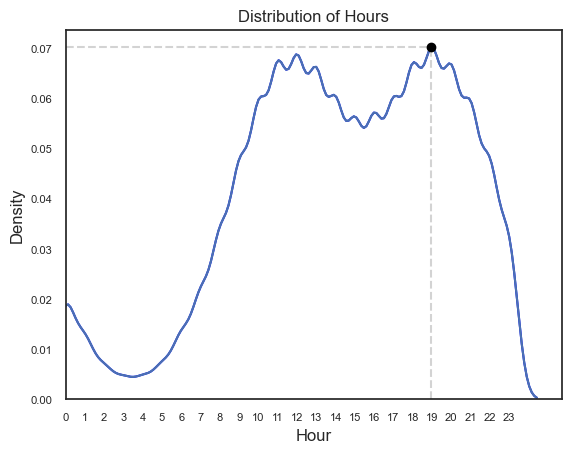

In [166]:
hours= [hour for hour, df in all_data.groupby('Hour')]

sns.kdeplot(all_data['Hour'], fill=False, color = 'blue')

# Calcula los datos de la distribución de la hora
density = sns.kdeplot(all_data['Hour']).get_lines()[0].get_data()
max_density_x = density[0][density[1].argmax()]
max_density_y = density[1].max()
plt.xticks(hours, fontsize = 8)
plt.yticks(fontsize= 8)

plt.scatter(max_density_x, max_density_y, color='black', marker='o', zorder=5) # Agrega un marcador en el punto más alto de la distribución


plt.plot([max_density_x, max_density_x], [0, max_density_y], color='lightgrey', linestyle='--') # Agrega una línea punteada desde el eje x hasta el punto más alto
plt.plot([0, max_density_x], [max_density_y, max_density_y], color='lightgrey', linestyle='--') # Agrega una línea punteada desde el eje y hasta el punto más alto

plt.xlim(left=all_data['Hour'].min()) 
# Ajusta el límite inferior del eje x para que comience desde el valor más bajo


plt.xlabel('Hour')
plt.ylabel('Density')
plt.title('Distribution of Hours')

plt.show()


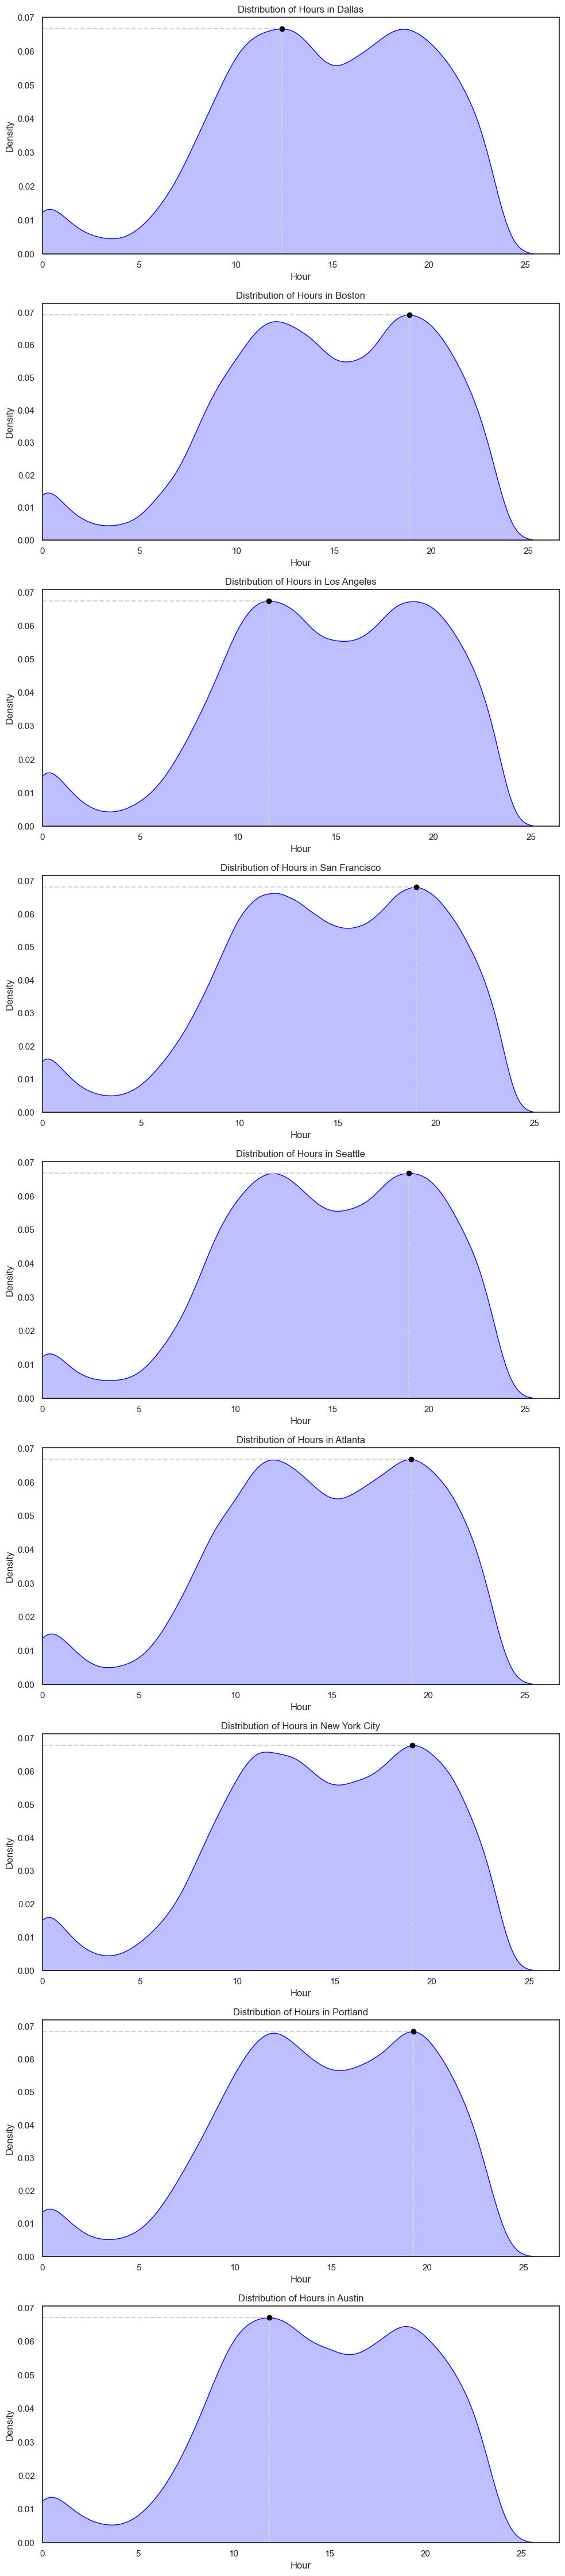

In [249]:

cities = all_data['City'].unique()


num_rows = len(cities)
num_cols = 1


fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5*num_rows))


for i, city in enumerate(cities): # Iterar sobre cada ciudad y trazar la distribución de las horas
    
    data_city = all_data[all_data['City'] == city]
    
   
    sns.kdeplot(data_city['Hour'], fill=True, ax=axes[i], color='blue')
    
   
    if len(axes[i].collections) > 0: # Verificar si hay datos en la distribución de horas
        
        density = axes[i].collections[0].get_paths()[0].vertices # Obtener los datos de la distribución de las horas
        max_density_x = density[:, 0][density[:, 1].argmax()]
        max_density_y = density[:, 1].max()
        
       
        axes[i].scatter(max_density_x, max_density_y, color='black', marker='o', zorder=5)
        
        
        axes[i].plot([max_density_x, max_density_x], [0, max_density_y], color='lightgrey', linestyle='--') # Agregar una línea punteada desde el eje x hasta el punto más alto
        
       
        axes[i].plot([0, max_density_x], [max_density_y, max_density_y], color='lightgrey', linestyle='--')
    
    
    axes[i].set_xlim(left=data_city['Hour'].min())
    
   
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Distribution of Hours in {city}')

plt.tight_layout()


plt.show()


4. What products are most often sold together?

In [169]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [171]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,31


In [174]:
# Realizar la operación de modificación utilizando .loc[]
df.loc[:, 'Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [175]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,42,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,42,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,31,"Bose SoundSport Headphones, Bose SoundSport He..."


In [177]:
df= df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [179]:
from itertools import combinations
from collections import Counter

In [180]:
count = Counter()
for row in df['Grouped'] :
    row_list =row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [183]:
count.most_common(3)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447)]

5. What products  sold the most and why do you think it sold the most?

In [184]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


In [208]:
unique_products = r['Product'].unique()
print(unique_products)

Product
20in Monitor                                [20in Monitor]
27in 4K Gaming Monitor            [27in 4K Gaming Monitor]
27in FHD Monitor                        [27in FHD Monitor]
34in Ultrawide Monitor            [34in Ultrawide Monitor]
AA Batteries (4-pack)              [AA Batteries (4-pack)]
AAA Batteries (4-pack)            [AAA Batteries (4-pack)]
Apple Airpods Headphones        [Apple Airpods Headphones]
Bose SoundSport Headphones    [Bose SoundSport Headphones]
Flatscreen TV                              [Flatscreen TV]
Google Phone                                [Google Phone]
LG Dryer                                        [LG Dryer]
LG Washing Machine                    [LG Washing Machine]
Lightning Charging Cable        [Lightning Charging Cable]
Macbook Pro Laptop                    [Macbook Pro Laptop]
ThinkPad Laptop                          [ThinkPad Laptop]
USB-C Charging Cable                [USB-C Charging Cable]
Vareebadd Phone                          [Vareeb

In [213]:
ventas_por_producto = all_data.groupby('Product')['Quantity Ordered'].sum()
ventas_por_producto



Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

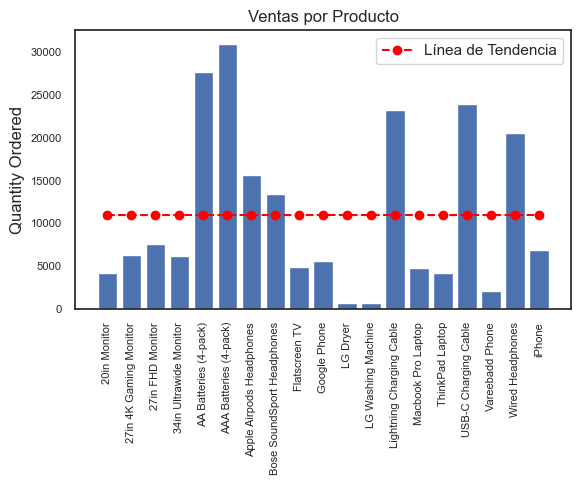

In [215]:


plt.bar(ventas_por_producto.index, ventas_por_producto.values)



plt.title('Ventas por Producto')
plt.ylabel('Quantity Ordered')

plt.xticks(rotation=90, ha='center', fontsize=8)
plt.yticks(ha='right', fontsize= 8)


plt.ticklabel_format(style='plain', axis='y')
plt.gcf().subplots_adjust(bottom=0.3)



plt.show()

In [217]:
all_data['Price Each'] = all_data['Price Each'].astype(float)


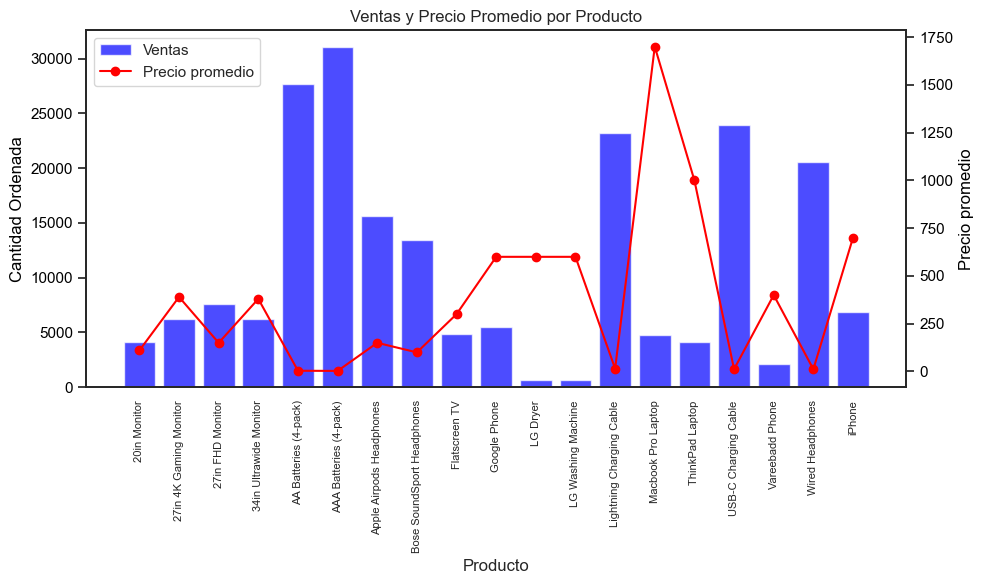

In [241]:

fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.bar(ventas_por_producto.index, ventas_por_producto.values, color='blue', alpha=0.7, label='Ventas')


ax1.set_ylabel('Cantidad Ordenada', color='black')
ax1.tick_params(axis='y', labelcolor='black')


ax2 = ax1.twinx()
ax2.plot(ventas_por_producto.index, prices, color='red', linestyle='-', marker='o', label='Precio promedio')


ax2.set_ylabel('Precio promedio', color='black')
ax2.tick_params(axis='y', labelcolor='black')


plt.title('Ventas y Precio Promedio por Producto')
ax1.set_xlabel('Producto')


ax1.set_xticks(ventas_por_producto.index)
ax1.set_xticklabels(ventas_por_producto.index, rotation=90, ha='center', fontsize=8)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')


plt.tight_layout()


plt.show()
